In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv')
data

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60632,36,08/30/2020,09/05/2020,117.0,4282.0,128.0,4703.5,1446.0,25164,...,27640.9,0.1,0.2,1,100,1.1,109.8,91039,60632-2020-36,POINT (-87.711251 41.810038)
1,60601,17,04/19/2020,04/25/2020,7.0,45.0,48.0,306.6,35.0,197,...,1342.4,0.1,0.1,1,2,6.8,13.6,14675,60601-2020-17,POINT (-87.622844 41.886262)
2,60632,39,09/20/2020,09/26/2020,107.0,4617.0,118.0,5071.5,1355.0,29203,...,32077.5,0.1,0.2,3,103,3.3,113.1,91039,60632-2020-39,POINT (-87.711251 41.810038)
3,60632,49,11/29/2020,12/05/2020,615.0,9447.0,676.0,10376.9,2884.0,53923,...,59230.7,0.3,0.2,6,135,6.6,148.3,91039,60632-2020-49,POINT (-87.711251 41.810038)
4,60632,50,12/06/2020,12/12/2020,581.0,10028.0,638.0,11015.1,2848.0,56771,...,62359.0,0.2,0.2,10,145,11.0,159.3,91039,60632-2020-50,POINT (-87.711251 41.810038)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11275,60707,36,09/03/2023,09/09/2023,3.0,5951.0,7.0,13833.4,NaN,4414,...,10260.6,0.0,0.1,0,66,0.0,153.4,43019,60707-2023-36,POINT (-87.808283 41.921777)
11276,60827,36,09/03/2023,09/09/2023,2.0,1279.0,7.0,4475.6,NaN,813,...,2844.9,0.0,0.1,0,19,0.0,66.5,28577,60827-2023-36,POINT (-87.633087 41.650765)
11277,60610,36,09/03/2023,09/09/2023,23.0,11467.0,59.0,29388.2,116.0,230789,...,591478.5,0.2,0.1,0,59,0.0,151.2,39019,60610-2023-36,POINT (-87.63581 41.90455)
11278,60642,36,09/03/2023,09/09/2023,4.0,5689.0,20.0,28162.0,37.0,92730,...,459036.7,0.1,0.1,0,31,0.0,153.5,20201,60642-2023-36,POINT (-87.657821 41.899935)


south side \
west side \
north side \
downtown/central \
southeast side \
southwest side (far southwest + southwest) \
northwest side \
far north side

In [3]:
# data cleaning
i = data.loc[data['ZIP Code'] == 'Unknown'].index
data = data.drop(i)
data['ZIP Code'] = pd.to_numeric(data['ZIP Code'])
data = data.dropna()

# 60666 is the airport's ZIP Code
j = data.loc[data['ZIP Code'] == 60666].index
data = data.drop(j)

In [4]:
# normalizing death rate
data['Death Rate - Normalized'] = data['Deaths - Cumulative'] / data['Population']

In [5]:
central_downtown = [60601,60602,60603,60604,60605,60606,60607,60611,60610,60642,60661,60654]
far_north_side = [60626,60645,60659,60660,60646,60631,60656,60640,60625,60630]
south_side = [60616, 60653, 60615, 60649, 60637,60827]
southwest_side = [60609, 60621, 60636, 60632, 60629, 60638, 60652, 60620, 60655, 60643] 
southeast_side = [60619, 60617, 60628, 60633]
north_side = [60614,60657,60613,60618,60647]
northwest_side = [60641,60634,60707,60639,60622]
west_side = [60608,60651,60644,60622,60612,60624,60623]


regions = {'Central/Downtown': central_downtown, 'Far North Side': far_north_side, 'South Side': south_side, \
           'Southwest Side': southwest_side, 'Southeast Side': southeast_side, 'North Side': north_side, \
           'Northwest Side': northwest_side, 'West Side': west_side}

In [6]:
data['Chicago Region'] = data['ZIP Code'].apply(lambda x: 'Central/Downtown' if x in central_downtown else \
                                               'Far North Side' if x in far_north_side else \
                                               'South Side' if x in south_side else \
                                               'Southwest Side' if x in southwest_side else \
                                               'Southeast Side' if x in southeast_side else \
                                               'North Side' if x in north_side else \
                                               'Northwest Side' if x in northwest_side else \
                                               'West Side' if x in west_side else x)

data.head()

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location,Death Rate - Normalized,Chicago Region
0,60632,36,08/30/2020,09/05/2020,117.0,4282.0,128.0,4703.5,1446.0,25164,...,0.2,1,100,1.1,109.8,91039,60632-2020-36,POINT (-87.711251 41.810038),0.001098,Southwest Side
1,60601,17,04/19/2020,04/25/2020,7.0,45.0,48.0,306.6,35.0,197,...,0.1,1,2,6.8,13.6,14675,60601-2020-17,POINT (-87.622844 41.886262),0.000136,Central/Downtown
2,60632,39,09/20/2020,09/26/2020,107.0,4617.0,118.0,5071.5,1355.0,29203,...,0.2,3,103,3.3,113.1,91039,60632-2020-39,POINT (-87.711251 41.810038),0.001131,Southwest Side
3,60632,49,11/29/2020,12/05/2020,615.0,9447.0,676.0,10376.9,2884.0,53923,...,0.2,6,135,6.6,148.3,91039,60632-2020-49,POINT (-87.711251 41.810038),0.001483,Southwest Side
4,60632,50,12/06/2020,12/12/2020,581.0,10028.0,638.0,11015.1,2848.0,56771,...,0.2,10,145,11.0,159.3,91039,60632-2020-50,POINT (-87.711251 41.810038),0.001593,Southwest Side


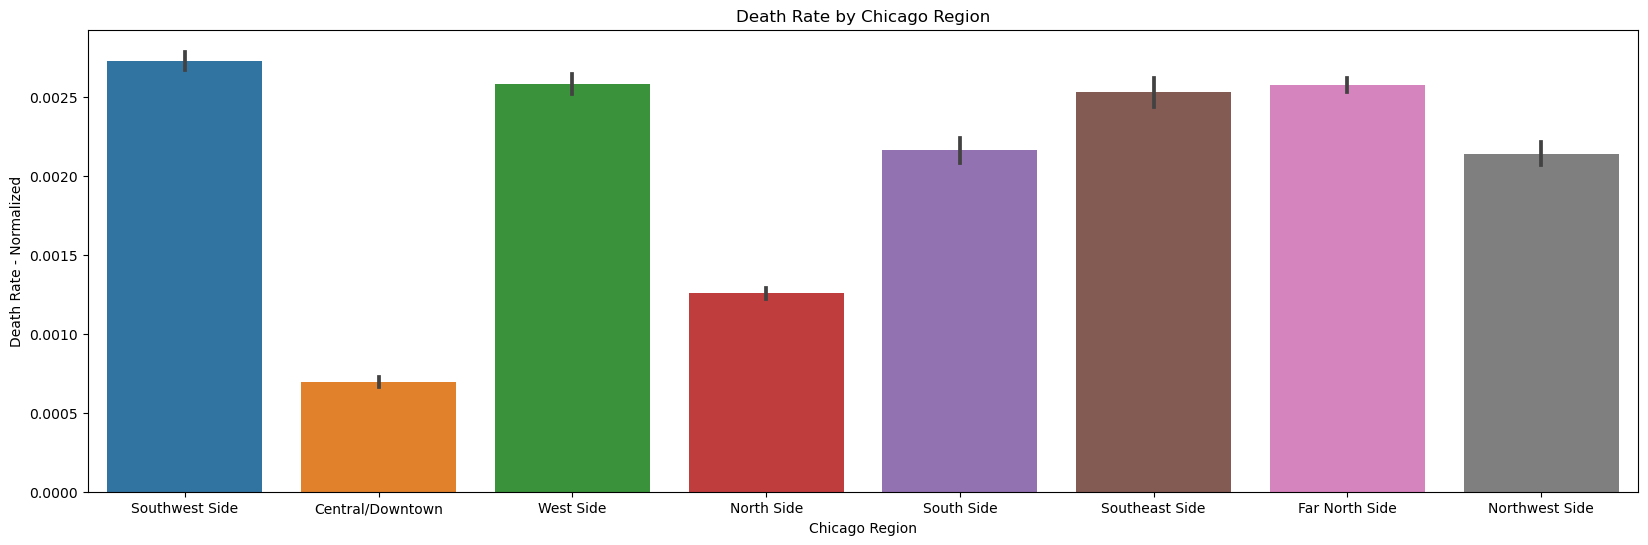

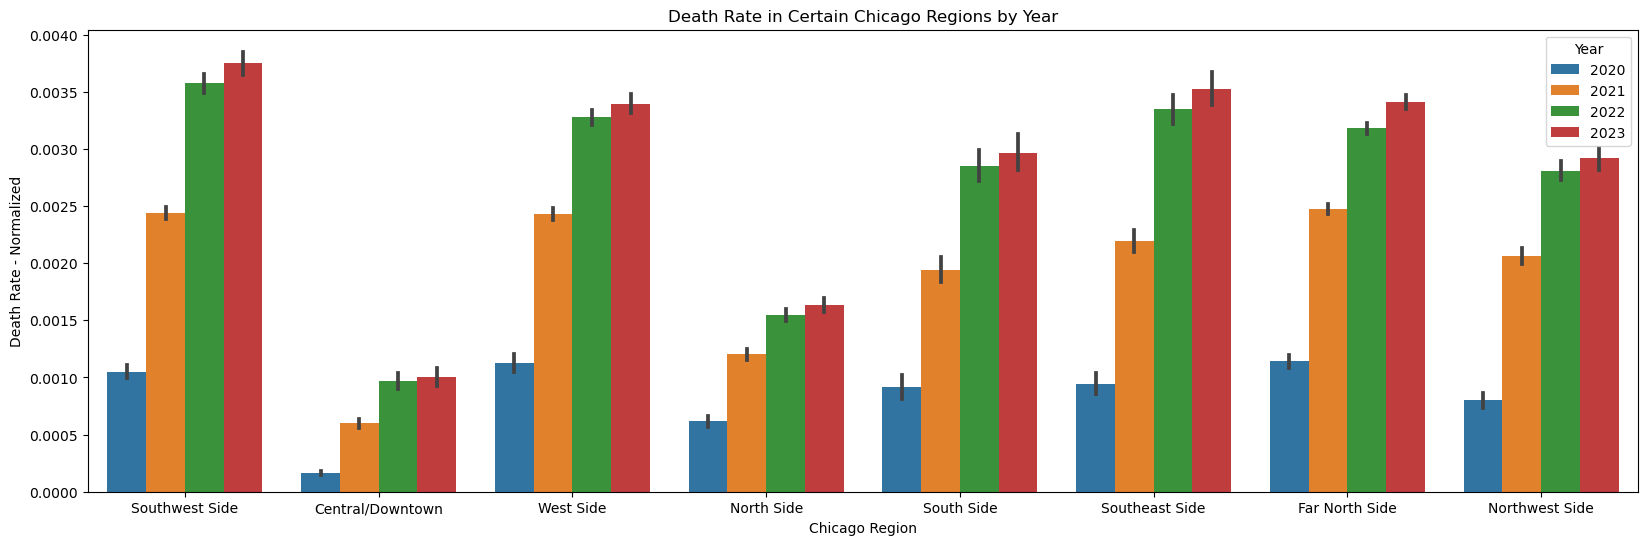

In [7]:
data['Week Start'] = pd.to_datetime(data['Week Start'])
data['Week End'] = pd.to_datetime(data['Week End'])
data['Year'] = data['Week Start'].dt.year

plt.figure(figsize = (20, 6))
sns.barplot(data = data, x = 'Chicago Region', y = 'Death Rate - Normalized')
plt.title('Death Rate by Chicago Region')
plt.show()

plt.figure(figsize = (20, 6))
sns.barplot(data = data, x = 'Chicago Region', y = 'Death Rate - Normalized', hue = 'Year')
plt.title('Death Rate in Certain Chicago Regions by Year')
plt.show()

In [8]:
# storing the total populations of certain chicago regions

total_population = {}
total1 = []
keys = []

for key in regions:
    filtered_data = data[data['ZIP Code'].isin(regions[key])]
    agg = filtered_data.groupby('ZIP Code')['Population'].sum().reset_index()
    total = agg['Population'].sum()
    total_population[key] = total
    total1.append(total)
    keys.append(key)
    print('Total', key, ':', total)

print(total_population)
print(total1)


Total Central/Downtown : 36959910
Total Far North Side : 88009434
Total South Side : 41766262
Total Southwest Side : 107008450
Total Southeast Side : 41524240
Total North Side : 69821499
Total Northwest Side : 54914181
Total West Side : 74384441
{'Central/Downtown': 36959910, 'Far North Side': 88009434, 'South Side': 41766262, 'Southwest Side': 107008450, 'Southeast Side': 41524240, 'North Side': 69821499, 'Northwest Side': 54914181, 'West Side': 74384441}
[36959910, 88009434, 41766262, 107008450, 41524240, 69821499, 54914181, 74384441]


In [9]:
list_of_lists = [keys, total1]

total_data = pd.DataFrame(list_of_lists).transpose()
total_data.columns = ['Chicago Region', 'Total Population']
total_data

,Chicago Region,Total Population
0,Central/Downtown,36959910
1,Far North Side,88009434
2,South Side,41766262
3,Southwest Side,107008450
4,Southeast Side,41524240
5,North Side,69821499
6,Northwest Side,54914181
7,West Side,74384441


Text(0.5, 1.0, 'Total Population of Chicago Regions')

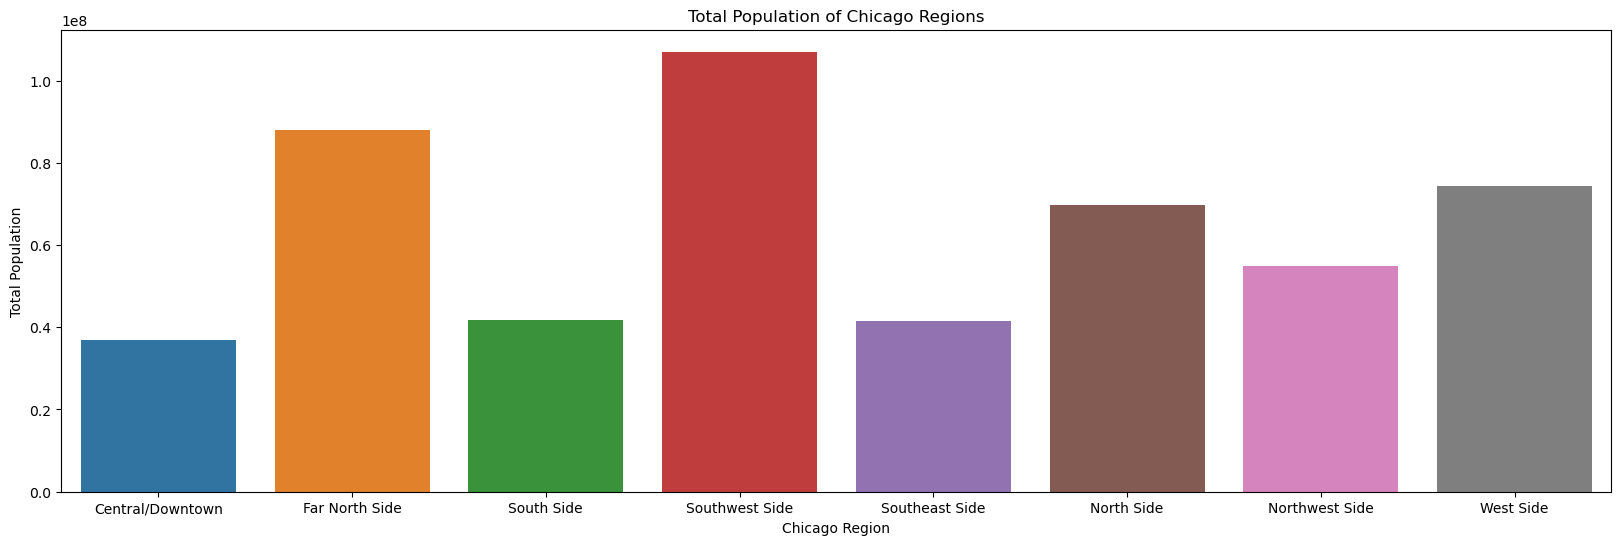

In [13]:
plt.figure(figsize = (20, 6))
sns.barplot(data = total_data, x = 'Chicago Region', y = 'Total Population')
plt.title('Total Population of Chicago Regions')

In [11]:
merged_df = pd.merge(data, total_data, on = 'Chicago Region')
merged_df.head()

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location,Death Rate - Normalized,Chicago Region,Year,Total Population
0,60632,36,2020-08-30,2020-09-05,117.0,4282.0,128.0,4703.5,1446.0,25164,...,100,1.1,109.8,91039,60632-2020-36,POINT (-87.711251 41.810038),0.001098,Southwest Side,2020,107008450
1,60632,39,2020-09-20,2020-09-26,107.0,4617.0,118.0,5071.5,1355.0,29203,...,103,3.3,113.1,91039,60632-2020-39,POINT (-87.711251 41.810038),0.001131,Southwest Side,2020,107008450
2,60632,49,2020-11-29,2020-12-05,615.0,9447.0,676.0,10376.9,2884.0,53923,...,135,6.6,148.3,91039,60632-2020-49,POINT (-87.711251 41.810038),0.001483,Southwest Side,2020,107008450
3,60632,50,2020-12-06,2020-12-12,581.0,10028.0,638.0,11015.1,2848.0,56771,...,145,11.0,159.3,91039,60632-2020-50,POINT (-87.711251 41.810038),0.001593,Southwest Side,2020,107008450
4,60632,51,2020-12-13,2020-12-19,383.0,10411.0,421.0,11435.8,2359.0,59130,...,155,11.0,170.3,91039,60632-2020-51,POINT (-87.711251 41.810038),0.001703,Southwest Side,2020,107008450


<Axes: xlabel='Chicago Region', ylabel='Death Rate - Normalized'>

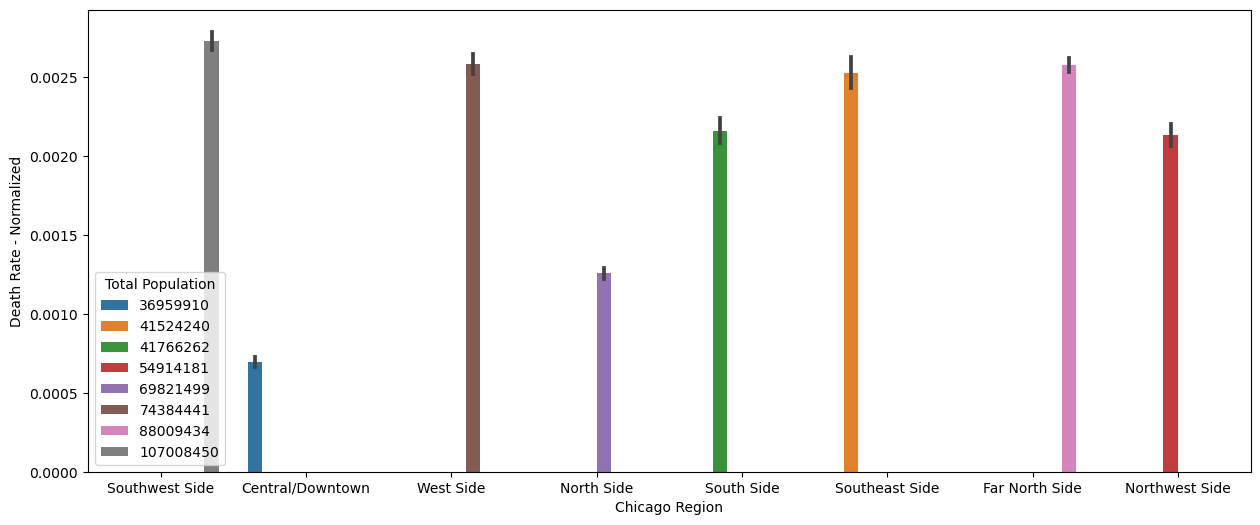

In [12]:
plt.figure(figsize = (15, 6))
sns.barplot(data = merged_df, x = 'Chicago Region', y = 'Death Rate - Normalized', hue = 'Total Population')

